## Aprendizaje No Supervisado

### Cluster No Jerárquico . K - Means (++) 
### Análisis de Componentes Principales

### 1 LIBRERÍAS A UTILIZAR

In [141]:
#Importar las librerías necesarias en Python.

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from scipy.stats.stats import pearsonr  
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist

#### Algoritmo de Reducción de Dimensaiones + Algoritmos de Segmentación K-Means (++)

La data de los diferentes paises del mundo tiene como variables los siguientes indicadores.

In [142]:
data = pd.read_csv('C:/Users/AnaMariaAp/Desktop/Machine Learning for Data Science-URP/DataSet/Aprendizaje No Supervisado/UN.csv')
data.head(10)

,country,region,tfr,contraception,educationMale,educationFemale,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
0,Afghanistan,Asia,6.90,NaN,NaN,NaN,45.0,46.0,154.0,2848.0,87.5,7.2,52.800,85.00
1,Albania,Europe,2.60,NaN,NaN,NaN,68.0,74.0,32.0,863.0,NaN,NaN,NaN,NaN
2,Algeria,Africa,3.81,52.0,11.1,9.9,67.5,70.3,44.0,1531.0,76.4,7.8,26.100,51.00
3,American.Samoa,Asia,NaN,NaN,NaN,NaN,68.0,73.0,11.0,NaN,58.8,42.4,0.264,0.36
4,Andorra,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Angola,Africa,6.69,NaN,NaN,NaN,44.9,48.1,124.0,355.0,NaN,NaN,NaN,NaN
6,Antigua,America,NaN,53.0,NaN,NaN,NaN,NaN,24.0,6966.0,74.4,56.2,NaN,NaN
7,Argentina,America,2.62,NaN,NaN,NaN,69.6,76.8,22.0,8055.0,76.2,41.3,3.800,3.80
8,Armenia,Europe,1.70,22.0,NaN,NaN,67.2,74.0,25.0,354.0,65.0,52.0,0.300,0.50
9,Australia,Oceania,1.89,76.0,16.3,16.1,75.4,81.2,6.0,20046.0,74.0,53.8,NaN,NaN


Observamos una gran cantidad de registros perdidos, los cuales podríamos imputar con algún algoritmo estudiado en clasee.

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.columns

Index(['country', 'region', 'tfr', 'contraception', 'educationMale',
       'educationFemale', 'lifeMale', 'lifeFemale', 'infantMortality',
       'GDPperCapita', 'economicActivityMale', 'economicActivityFemale',
       'illiteracyMale', 'illiteracyFemale'],
      dtype='object')

In [5]:
data['country'][0]

'Afghanistan'

In [7]:
data[0:4]['country']

0       Afghanistan
1           Albania
2           Algeria
3    American.Samoa
Name: country, dtype: object

In [8]:
print('Estructura de los datos')
[(col, type(data[col][0])) for col in data.columns] 

Estructura de los datos


[('country', str),
 ('region', str),
 ('tfr', numpy.float64),
 ('contraception', numpy.float64),
 ('educationMale', numpy.float64),
 ('educationFemale', numpy.float64),
 ('lifeMale', numpy.float64),
 ('lifeFemale', numpy.float64),
 ('infantMortality', numpy.float64),
 ('GDPperCapita', numpy.float64),
 ('economicActivityMale', numpy.float64),
 ('economicActivityFemale', numpy.float64),
 ('illiteracyMale', numpy.float64),
 ('illiteracyFemale', numpy.float64)]

#### % de Valores Perdidos o Missings por Variables

In [63]:
# Dimensiones de la data
data.shape

(207, 14)

In [64]:
# Vemos el % de Valores perdidos por variables
data.count(0)

country                   207
region                    207
tfr                       197
contraception             144
educationMale              76
educationFemale            76
lifeMale                  196
lifeFemale                196
infantMortality           201
GDPperCapita              197
economicActivityMale      165
economicActivityFemale    165
illiteracyMale            160
illiteracyFemale          160
dtype: int64

In [143]:
# Vemos el % de Valores perdidos por variables
print('% de poblamiento de las variables')
data.count(0)/data.shape[0] * 100

% de poblamiento de las variables


country                   100.000000
region                    100.000000
tfr                        95.169082
contraception              69.565217
educationMale              36.714976
educationFemale            36.714976
lifeMale                   94.685990
lifeFemale                 94.685990
infantMortality            97.101449
GDPperCapita               95.169082
economicActivityMale       79.710145
economicActivityFemale     79.710145
illiteracyMale             77.294686
illiteracyFemale           77.294686
dtype: float64

Por ésta vez vamos a considerar sólo las variables que estén con la información completa.

In [144]:
df = data[['tfr','contraception','lifeMale', 'lifeFemale', 'infantMortality', 'GDPperCapita','economicActivityMale','economicActivityFemale','illiteracyMale','illiteracyFemale']]
df = df.dropna(how='any')

In [145]:
# Vemos el % de Valores perdidos por variables
print('% de poblamiento de las variables')
df.count(0)/df.shape[0] * 100

% de poblamiento de las variables


tfr                       100.0
contraception             100.0
lifeMale                  100.0
lifeFemale                100.0
infantMortality           100.0
GDPperCapita              100.0
economicActivityMale      100.0
economicActivityFemale    100.0
illiteracyMale            100.0
illiteracyFemale          100.0
dtype: float64

In [146]:
df.shape

(97, 10)

In [147]:
df[:10]

,tfr,contraception,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
2,3.81,52.0,67.5,70.3,44.0,1531.0,76.4,7.8,26.100,51.000
8,1.70,22.0,67.2,74.0,25.0,354.0,65.0,52.0,0.300,0.500
12,1.95,62.0,70.5,77.1,14.0,12545.0,81.2,67.0,1.500,2.000
13,2.97,53.0,71.1,75.3,18.0,9073.0,88.2,29.2,10.900,20.600
14,3.14,49.0,58.1,58.2,78.0,280.0,88.8,55.9,50.600,73.900
15,1.73,55.0,73.6,78.7,9.0,7173.0,73.4,61.4,2.000,3.200
16,1.40,50.0,64.4,74.8,15.0,994.0,76.4,61.3,0.300,0.600
18,3.66,47.0,73.4,76.1,30.0,2569.0,79.0,34.0,21.252,23.472
19,5.83,16.0,52.4,57.2,84.0,391.0,90.0,57.8,51.300,74.200
21,4.36,45.0,59.8,63.2,66.0,909.0,74.1,56.3,9.500,24.000


### Analizamos la relación existente entre las variables


In [72]:
matrix_correlations_paises=df.corr()
matrix_correlations_paises

,tfr,contraception,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
tfr,1.000000,-0.700416,-0.732188,-0.825177,0.820365,-0.371675,0.383166,-0.164210,0.729894,0.759104
contraception,-0.700416,1.000000,0.684806,0.683828,-0.686826,0.342377,-0.187386,0.019584,-0.557717,-0.562519
lifeMale,-0.732188,0.684806,1.000000,0.965744,-0.873587,0.483363,-0.197267,-0.217249,-0.630533,-0.667473
lifeFemale,-0.825177,0.683828,0.965744,1.000000,-0.923671,0.469520,-0.278806,-0.110261,-0.720828,-0.770696
infantMortality,0.820365,-0.686826,-0.873587,-0.923671,1.000000,-0.446811,0.292581,0.072473,0.738038,0.793417
GDPperCapita,-0.371675,0.342377,0.483363,0.469520,-0.446811,1.000000,-0.129578,-0.040779,-0.280243,-0.281056
economicActivityMale,0.383166,-0.187386,-0.197267,-0.278806,0.292581,-0.129578,1.000000,0.135534,0.425205,0.379959
economicActivityFemale,-0.164210,0.019584,-0.217249,-0.110261,0.072473,-0.040779,0.135534,1.000000,-0.119927,-0.175309
illiteracyMale,0.729894,-0.557717,-0.630533,-0.720828,0.738038,-0.280243,0.425205,-0.119927,1.000000,0.961777
illiteracyFemale,0.759104,-0.562519,-0.667473,-0.770696,0.793417,-0.281056,0.379959,-0.175309,0.961777,1.000000


### Exportamos la información a un csv para poder visualizar las relaciones.

In [ ]:
matrix_correlations_paises.to_csv('C:/Users/AnaMariaAp/Desktop/Machine Learning for Data Science-URP/DataSet/Aprendizaje No Supervisado/Matrix_correlations_paises.csv')

### Reducir el número de dimensiones de los datos con ACP
### Análisis de Componentes Principales (ACP)

In [148]:
pc_toarray = df.values
pc_toarray

array([[  3.81000000e+00,   5.20000000e+01,   6.75000000e+01,
          7.03000000e+01,   4.40000000e+01,   1.53100000e+03,
          7.64000000e+01,   7.80000000e+00,   2.61000000e+01,
          5.10000000e+01],
       [  1.70000000e+00,   2.20000000e+01,   6.72000000e+01,
          7.40000000e+01,   2.50000000e+01,   3.54000000e+02,
          6.50000000e+01,   5.20000000e+01,   3.00000000e-01,
          5.00000000e-01],
       [  1.95000000e+00,   6.20000000e+01,   7.05000000e+01,
          7.71000000e+01,   1.40000000e+01,   1.25450000e+04,
          8.12000000e+01,   6.70000000e+01,   1.50000000e+00,
          2.00000000e+00],
       [  2.97000000e+00,   5.30000000e+01,   7.11000000e+01,
          7.53000000e+01,   1.80000000e+01,   9.07300000e+03,
          8.82000000e+01,   2.92000000e+01,   1.09000000e+01,
          2.06000000e+01],
       [  3.14000000e+00,   4.90000000e+01,   5.81000000e+01,
          5.82000000e+01,   7.80000000e+01,   2.80000000e+02,
          8.88000000e+01

In [149]:
# ¿ Porqué es importante escalar las variables ?
from sklearn.preprocessing import scale
# Escalamos los valores para poder aplicar el ACP
pc_toarray = scale(pc_toarray)

In [150]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

Realizando el análisis de Componentes Principales

In [151]:
# Qué algoritmo multivariable podemos usar para variables cualitativas
hpc = PCA(n_components=10).fit(pc_toarray)
hpc

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [152]:
# Porcentaje de la Varianza Explicada por cada componente
hpc.explained_variance_ratio_

array([ 0.58858332,  0.12418127,  0.10245655,  0.07403812,  0.04929412,
        0.03151779,  0.014864  ,  0.01084343,  0.00283283,  0.00138858])

In [153]:
# Porcentaje de la Varianza Explicada Acumulada
var1=np.cumsum(np.round(hpc.explained_variance_ratio_, decimals=4)*100)
var1

array([  58.86,   71.28,   81.53,   88.93,   93.86,   97.01,   98.5 ,
         99.58,   99.86,  100.  ])

In [154]:
# Número de Componentes Principales
hpc.n_components_

10

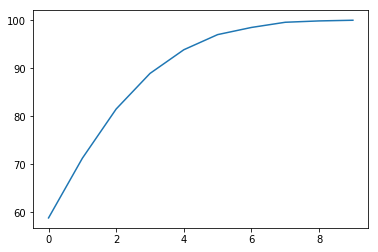

In [155]:
# Gráfico de % de Varianza Exlicado
plt.plot(var1)

In [156]:
hpc = PCA(n_components=4).fit_transform(pc_toarray)

### Hay que determinar el número de clusters, cómo lo hacemos?

Nos da una idea de la cantidad de clusters necesarios para segmentar nuestros datos.

In [157]:
# Determinar el valor de k (Número de Clusters)
k_range = range(1,20)

# Ajustar el algoritmo de K-Means para cada valor de k
k_means_var = [KMeans(n_clusters=k).fit(hpc) for k in k_range]

In [158]:
# Extraer los centroides o centros de cluster para cada modelo ajustado
centroids = [X.cluster_centers_ for X in k_means_var]

In [159]:
# Calcular la distancia euclídea de cada punto a cada uno de los centros de cluster.
k_euclid = [cdist(hpc, cent, 'euclidean') for cent in centroids]
#k_euclid[0]
#k_euclid[1]
#k_euclid[2]

In [86]:
# Calcular la mínima distancia de cada punto a cada a un cluster
dist = [np.min(ke,axis=1) for ke in k_euclid]
dist[1]

array([ 3.02515128,  2.12681408,  2.27015489,  2.00481163,  1.96232163,
        1.56285758,  1.49638672,  1.38020127,  1.87438851,  2.40422629,
        1.47727388,  1.37893369,  3.59183261,  3.75142248,  2.12982669,
        0.89143185,  2.25606312,  0.79938874,  0.9698154 ,  1.62190867,
        1.54918135,  1.22546936,  0.87617064,  2.78215983,  1.42282213,
        1.48839683,  2.2960168 ,  1.61106875,  2.3051683 ,  1.28295305,
        2.79982113,  2.49066293,  0.39911884,  2.34260027,  3.97856391,
        2.30836932,  1.78344805,  1.70364422,  2.88003193,  2.85831478,
        1.47681939,  0.79146458,  2.5561158 ,  1.54035449,  1.60470776,
        2.44014267,  1.64482014,  1.54508206,  1.64225083,  3.37501645,
        0.50567736,  2.00581089,  0.9942475 ,  1.13433661,  1.65132242,
        2.68591063,  2.43261034,  2.4243212 ,  0.79328089,  2.64543461,
        2.48877559,  0.77631659,  2.38254591,  1.04973489,  1.73349851,
        3.42312797,  1.2444976 ,  1.99315081,  2.55601921,  2.97

In [160]:
# Hpc son las puntuaciones factoriales o nuevas variables que son combinaciones lineales de las anteriores
hpc

array([[ 0.32358057,  2.25063269,  0.62161949, -0.79845776],
       [-1.55687058, -1.04107824,  1.83553096,  0.11374063],
       [-2.51605611, -0.76838707, -1.53678834,  0.93469974],
       [-1.30901434,  1.3048037 , -1.47195555, -0.34722548],
       [ 2.6921884 , -0.10576982, -1.68464323, -0.3780492 ],
       [-2.69026797, -0.67930794, -0.24490005,  0.41662681],
       [-1.81745162, -1.44822807,  0.07688711, -0.46309752],
       [-0.76908909,  1.00459886, -0.21891918, -0.70637815],
       [ 4.22832876, -0.15657465, -1.42472951, -0.05562593],
       [ 0.74051818, -1.01540218,  0.60311004,  0.09570697],
       [ 2.1174244 , -0.3753875 ,  0.78916673,  0.70741163],
       [-0.85419482, -0.50955479, -1.21304202, -0.34655825],
       [ 6.02418873, -1.11475333, -1.67119533,  0.74673303],
       [ 5.51210145, -2.10640044, -1.74782407,  0.74718066],
       [ 3.74573886, -1.68117357, -0.8319057 ,  0.26054203],
       [-1.8206533 ,  0.53130251,  0.42326161, -0.23790696],
       [-1.17136226, -1.

In [161]:
# Vemos los centroides de cada clúster , si tenemos 1 cluster 1 centroide y así sucesivamente.
centroids[0]
#centroids[1]
#centroids[2]

array([[ -1.05299503e-16,   6.40953499e-17,   2.97585553e-17,
         -4.43516930e-17]])

In [162]:
# Objeto que tiene las distancias a cada uno de los cluster
#k_euclid[0]
#k_euclid[1]
#k_euclid[2]

Calculamos la suma de los cuadrados de la distancia

In [163]:
avgWithinSumSquare = [sum(d)/hpc.shape[0] for d in dist]
avgWithinSumSquare

[2.7018192051191492,
 1.9460522874676081,
 1.7529566575772344,
 1.5770564603604822,
 1.4261651871522532,
 1.322087745779595,
 1.2569932857422721,
 1.2041342274902957,
 1.1448459376028897,
 1.0942889272972507,
 1.0648261510582127,
 1.027346694781653,
 0.98750267121521673,
 0.94586259226634184,
 0.91311361717614015,
 0.88739119397259769,
 0.85949737825448547,
 0.82456966935342091,
 0.81030335442366885]

Gráfica que nos permite determinar el número de clusters apropiados para la segmentación

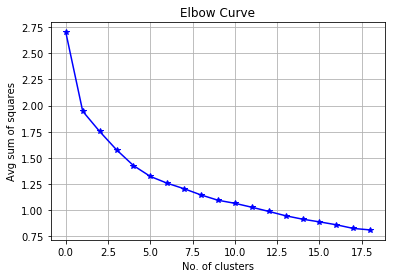

In [164]:
# Ploteamos el gráfico del codo de yambú para elegir el número apropiado de clusters
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(avgWithinSumSquare, 'b*-')
plt.grid(True)
plt.xlabel('No. of clusters')
plt.ylabel('Avg sum of squares')
tt = plt.title('Elbow Curve')

Tomando como referencia el gráfico, buscaremos 6 clusters

### Clustering de los paises en bases a sus indicadores de desarrollo

In [165]:
# Usamos el algoritmo de K-Means ++
km = KMeans(6, init='k-means++', random_state = 3425) 
km.fit(hpc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=3425, tol=0.0001, verbose=0)

In [166]:
# Guardamos la variable del segmento o grupo en nustra base de datos
df['SegmentoPais'] = km.predict(hpc)
df.head()

,tfr,contraception,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale,SegmentoPais
2,3.81,52.0,67.5,70.3,44.0,1531.0,76.4,7.8,26.1,51.0,3
8,1.70,22.0,67.2,74.0,25.0,354.0,65.0,52.0,0.3,0.5,0
12,1.95,62.0,70.5,77.1,14.0,12545.0,81.2,67.0,1.5,2.0,5
13,2.97,53.0,71.1,75.3,18.0,9073.0,88.2,29.2,10.9,20.6,2
14,3.14,49.0,58.1,58.2,78.0,280.0,88.8,55.9,50.6,73.9,1


In [167]:
# Cantidad de elementos por grupo
df.groupby('SegmentoPais').contraception.count()

SegmentoPais
0    25
1    15
2    24
3    11
4    11
5    11
Name: contraception, dtype: int64

In [168]:
# Siempre le debemos poner un nombre al grupo o cluster de acuerdo a las características que tiene
clust_map = {
    0:'Cluster0',
    1:'Cluster1',
    2:'Cluster2',
    3:'Cluster3',
    4:'Cluster4',
    5:'Cluster5'
}

df.SegmentoPais = df.SegmentoPais.map(clust_map)
df[:10]

,tfr,contraception,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale,SegmentoPais
2,3.81,52.0,67.5,70.3,44.0,1531.0,76.4,7.8,26.100,51.000,Cluster3
8,1.70,22.0,67.2,74.0,25.0,354.0,65.0,52.0,0.300,0.500,Cluster0
12,1.95,62.0,70.5,77.1,14.0,12545.0,81.2,67.0,1.500,2.000,Cluster5
13,2.97,53.0,71.1,75.3,18.0,9073.0,88.2,29.2,10.900,20.600,Cluster2
14,3.14,49.0,58.1,58.2,78.0,280.0,88.8,55.9,50.600,73.900,Cluster1
15,1.73,55.0,73.6,78.7,9.0,7173.0,73.4,61.4,2.000,3.200,Cluster0
16,1.40,50.0,64.4,74.8,15.0,994.0,76.4,61.3,0.300,0.600,Cluster0
18,3.66,47.0,73.4,76.1,30.0,2569.0,79.0,34.0,21.252,23.472,Cluster2
19,5.83,16.0,52.4,57.2,84.0,391.0,90.0,57.8,51.300,74.200,Cluster1
21,4.36,45.0,59.8,63.2,66.0,909.0,74.1,56.3,9.500,24.000,Cluster4


In [101]:
df.to_csv('C:/Users/AnaMariaAp/Desktop/Machine Learning for Data Science-URP/DataSet/Aprendizaje No Supervisado/Dataset_Grupos.csv')

Analizamos el PBI vs mortalidad infantil en cada cluster.

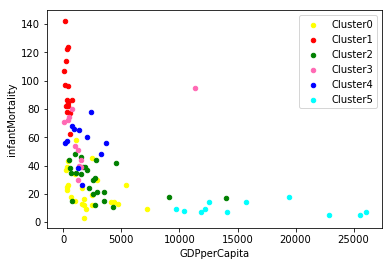

In [169]:
d_color = {
    'Cluster0':'yellow',
    'Cluster1':'red',
    'Cluster2':'green',
    'Cluster3':'hotpink',
    'Cluster4':'blue',
    'Cluster5':'aqua'
}

fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df[df.SegmentoPais == clust].plot(kind='scatter', x='GDPperCapita', y='infantMortality', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="upper right")

Cuando el PBI es bajo la mortalidad infantil es alta.

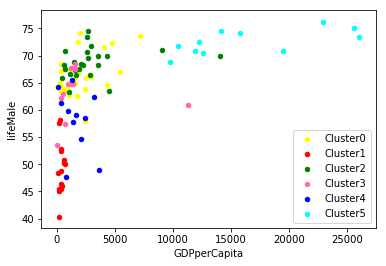

In [170]:
fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df[df.SegmentoPais == clust].plot(kind='scatter', x='GDPperCapita', y='lifeMale', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="lower right")

Esperanza de vida se incrementa mientras el pais está más desarrollado

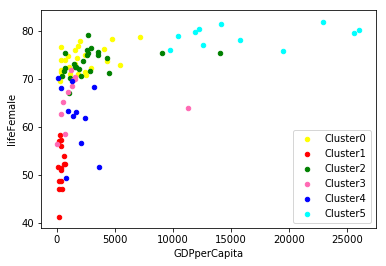

In [171]:
fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df[df.SegmentoPais == clust].plot(kind='scatter', x='GDPperCapita', y='lifeFemale', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="lower right")

Esperanza de vida se incrementa mientras el pais está más desarrollado

In [172]:
from sklearn import metrics
import numpy as np
from sklearn.cluster import KMeans

#kmeans_model = KMeans(n_clusters=3, randomkm[0]_state=1).fit(X)
labels = km.labels_
metrics.silhouette_score(hpc, labels, metric='euclidean')

0.28645908838544482

### Clustering Affinity Propagation

In [173]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Compute Affinity Propagation
af = AffinityPropagation(preference=-50).fit(hpc)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

In [174]:
# Tamaño calculado para cada cluster
af.cluster_centers_indices_

array([ 7, 29, 32, 67], dtype=int64)

In [121]:
# Etiqueta de cada cluster
#af.labels_

In [175]:
#Generamos las medidas idóneas de agrupación de clusters
print('Número de cluster estimados: %d' % n_clusters_)
print("Coeficiente Silhouette: %0.3f"
      % metrics.silhouette_score(hpc, labels, metric='sqeuclidean'))

Número de cluster estimados: 3
Coeficiente Silhouette: 0.411


In [176]:
# Guardamos la variable del segmento o grupo en nustra base de datos, hacemos una copia de la información
df2=df[['tfr','contraception','lifeMale','infantMortality','GDPperCapita','economicActivityMale','economicActivityFemale',
        'illiteracyMale','illiteracyFemale']]
df2.head(10)

,tfr,contraception,lifeMale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
2,3.81,52.0,67.5,44.0,1531.0,76.4,7.8,26.100,51.000
8,1.70,22.0,67.2,25.0,354.0,65.0,52.0,0.300,0.500
12,1.95,62.0,70.5,14.0,12545.0,81.2,67.0,1.500,2.000
13,2.97,53.0,71.1,18.0,9073.0,88.2,29.2,10.900,20.600
14,3.14,49.0,58.1,78.0,280.0,88.8,55.9,50.600,73.900
15,1.73,55.0,73.6,9.0,7173.0,73.4,61.4,2.000,3.200
16,1.40,50.0,64.4,15.0,994.0,76.4,61.3,0.300,0.600
18,3.66,47.0,73.4,30.0,2569.0,79.0,34.0,21.252,23.472
19,5.83,16.0,52.4,84.0,391.0,90.0,57.8,51.300,74.200
21,4.36,45.0,59.8,66.0,909.0,74.1,56.3,9.500,24.000


In [179]:
df2['SegmentoPais'] = af.predict(hpc)
df2.head()

C:\Users\Andre Chavez\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,tfr,contraception,lifeMale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale,SegmentoPais
2,3.81,52.0,67.5,44.0,1531.0,76.4,7.8,26.1,51.0,0
8,1.70,22.0,67.2,25.0,354.0,65.0,52.0,0.3,0.5,1
12,1.95,62.0,70.5,14.0,12545.0,81.2,67.0,1.5,2.0,3
13,2.97,53.0,71.1,18.0,9073.0,88.2,29.2,10.9,20.6,0
14,3.14,49.0,58.1,78.0,280.0,88.8,55.9,50.6,73.9,2


In [181]:
# Cantidad de elementos por grupo
df2.groupby('SegmentoPais').contraception.count()

SegmentoPais
0    29
1    27
2    26
3    15
Name: contraception, dtype: int64

In [182]:
# Siempre le debemos poner un nombre al grupo o cluster de acuerdo a las características que tiene
clust_map = {
    0:'Cluster0',
    1:'Cluster1',
    2:'Cluster2',
    3:'Cluster3'
}

df2.SegmentoPais = df2.SegmentoPais.map(clust_map)
df2[:10]

C:\Users\Andre Chavez\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,tfr,contraception,lifeMale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale,SegmentoPais
2,3.81,52.0,67.5,44.0,1531.0,76.4,7.8,26.100,51.000,Cluster0
8,1.70,22.0,67.2,25.0,354.0,65.0,52.0,0.300,0.500,Cluster1
12,1.95,62.0,70.5,14.0,12545.0,81.2,67.0,1.500,2.000,Cluster3
13,2.97,53.0,71.1,18.0,9073.0,88.2,29.2,10.900,20.600,Cluster0
14,3.14,49.0,58.1,78.0,280.0,88.8,55.9,50.600,73.900,Cluster2
15,1.73,55.0,73.6,9.0,7173.0,73.4,61.4,2.000,3.200,Cluster3
16,1.40,50.0,64.4,15.0,994.0,76.4,61.3,0.300,0.600,Cluster1
18,3.66,47.0,73.4,30.0,2569.0,79.0,34.0,21.252,23.472,Cluster0
19,5.83,16.0,52.4,84.0,391.0,90.0,57.8,51.300,74.200,Cluster2
21,4.36,45.0,59.8,66.0,909.0,74.1,56.3,9.500,24.000,Cluster1


Analizamos el PBI vs mortalidad infantil en cada cluster.

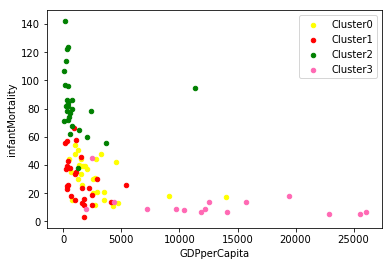

In [183]:
d_color = {
    'Cluster0':'yellow',
    'Cluster1':'red',
    'Cluster2':'green',
    'Cluster3':'hotpink'
}

fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df2[df2.SegmentoPais == clust].plot(kind='scatter', x='GDPperCapita', y='infantMortality', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="upper right")

Analizamos el PBI vs la esperanza de vida en hombres en cada cluster.

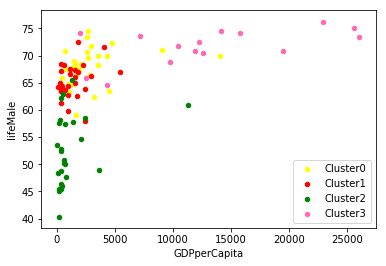

In [184]:
fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df2[df2.SegmentoPais == clust].plot(kind='scatter', x='GDPperCapita', y='lifeMale', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="lower right")

### Clustering DBSCAN

In [218]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph


model = AgglomerativeClustering(linkage='ward',n_clusters=4)
t0 = time.time()
model.fit(hpc)
labels = model.labels_
#Generamos las medidas idóneas de agrupación de clusters
print('Número de cluster estimados: %d' % 4)
print("Coeficiente Silhouette: %0.3f"
      % metrics.silhouette_score(hpc, labels, metric='sqeuclidean'))

Número de cluster estimados: 4
Coeficiente Silhouette: 0.455


In [214]:
# Guardamos la variable del segmento o grupo en nustra base de datos, hacemos una copia de la información
df3=df[['tfr','contraception','lifeMale','infantMortality','GDPperCapita','economicActivityMale','economicActivityFemale',
        'illiteracyMale','illiteracyFemale']]
df3.head(10)

,tfr,contraception,lifeMale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
2,3.81,52.0,67.5,44.0,1531.0,76.4,7.8,26.100,51.000
8,1.70,22.0,67.2,25.0,354.0,65.0,52.0,0.300,0.500
12,1.95,62.0,70.5,14.0,12545.0,81.2,67.0,1.500,2.000
13,2.97,53.0,71.1,18.0,9073.0,88.2,29.2,10.900,20.600
14,3.14,49.0,58.1,78.0,280.0,88.8,55.9,50.600,73.900
15,1.73,55.0,73.6,9.0,7173.0,73.4,61.4,2.000,3.200
16,1.40,50.0,64.4,15.0,994.0,76.4,61.3,0.300,0.600
18,3.66,47.0,73.4,30.0,2569.0,79.0,34.0,21.252,23.472
19,5.83,16.0,52.4,84.0,391.0,90.0,57.8,51.300,74.200
21,4.36,45.0,59.8,66.0,909.0,74.1,56.3,9.500,24.000


In [216]:
df3['SegmentoPais'] = model.fit_predict(hpc)
df3.head()

C:\Users\Andre Chavez\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,tfr,contraception,lifeMale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale,SegmentoPais
2,3.81,52.0,67.5,44.0,1531.0,76.4,7.8,26.1,51.0,2
8,1.70,22.0,67.2,25.0,354.0,65.0,52.0,0.3,0.5,1
12,1.95,62.0,70.5,14.0,12545.0,81.2,67.0,1.5,2.0,3
13,2.97,53.0,71.1,18.0,9073.0,88.2,29.2,10.9,20.6,3
14,3.14,49.0,58.1,78.0,280.0,88.8,55.9,50.6,73.9,2


In [217]:
# Cantidad de elementos por grupo
df3.groupby('SegmentoPais').contraception.count()

SegmentoPais
0    18
1    48
2    17
3    14
Name: contraception, dtype: int64

In [219]:
# Siempre le debemos poner un nombre al grupo o cluster de acuerdo a las características que tiene
clust_map = {
    0:'Cluster0',
    1:'Cluster1',
    2:'Cluster2',
    3:'Cluster3'
}

df3.SegmentoPais = df3.SegmentoPais.map(clust_map)
df3[:10]

C:\Users\Andre Chavez\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,tfr,contraception,lifeMale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale,SegmentoPais
2,3.81,52.0,67.5,44.0,1531.0,76.4,7.8,26.100,51.000,Cluster2
8,1.70,22.0,67.2,25.0,354.0,65.0,52.0,0.300,0.500,Cluster1
12,1.95,62.0,70.5,14.0,12545.0,81.2,67.0,1.500,2.000,Cluster3
13,2.97,53.0,71.1,18.0,9073.0,88.2,29.2,10.900,20.600,Cluster3
14,3.14,49.0,58.1,78.0,280.0,88.8,55.9,50.600,73.900,Cluster2
15,1.73,55.0,73.6,9.0,7173.0,73.4,61.4,2.000,3.200,Cluster3
16,1.40,50.0,64.4,15.0,994.0,76.4,61.3,0.300,0.600,Cluster1
18,3.66,47.0,73.4,30.0,2569.0,79.0,34.0,21.252,23.472,Cluster1
19,5.83,16.0,52.4,84.0,391.0,90.0,57.8,51.300,74.200,Cluster0
21,4.36,45.0,59.8,66.0,909.0,74.1,56.3,9.500,24.000,Cluster1


Analizamos el PBI vs mortalidad infantil en cada cluster.

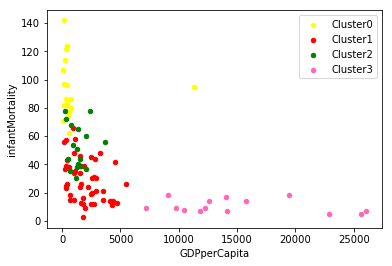

In [220]:
d_color = {
    'Cluster0':'yellow',
    'Cluster1':'red',
    'Cluster2':'green',
    'Cluster3':'hotpink'
}

fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df3[df3.SegmentoPais == clust].plot(kind='scatter', x='GDPperCapita', y='infantMortality', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="upper right")